In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np

In [ ]:
data_path = '/workspace/Kamakshi/TRAIN'
data_dir_list = ['0', '1', '2', '3']
train = []
train_labels = []

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    print('Loaded the images of dataset-' + '{}\n'.format(dataset))
    for img in img_list:
        if img[-3:] == 'png':
            input_img = cv2.imread(data_path + '/' + dataset + '/' + img)
            train_labels.append(dataset)
            input_img_resize = cv2.resize(input_img, (224, 224))
            train.append(input_img_resize)

t_label=np.array(train_labels)
t_data = np.array(train)
t_data = t_data.astype('float32')
t_data = t_data/255
t_data.shape

Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2



libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Loaded the images of dataset-3



(14956, 224, 224, 3)

In [ ]:
data_path = '/workspace/Kamakshi/TEST'
data_dir_list = ['0', '1', '2', '3']
test = []
test_labels = []

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    print('Loaded the images of dataset-' + '{}\n'.format(dataset))
    for img in img_list:
        if img[-3:] == 'png':
            input_img = cv2.imread(data_path + '/' + dataset + '/' + img)
            test_labels.append(dataset)
            input_img_resize = cv2.resize(input_img, (224, 224))
            test.append(input_img_resize)

test_label=np.array(test_labels)
test_data = np.array(test)
test_data = test_data.astype('float32')
test_data = test_data/255
test_data.shape

Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3



(6769, 224, 224, 3)

In [ ]:
data_path = '/workspace/Kamakshi/VALIDATION'
data_dir_list = ['0', '1', '2', '3']
val = []
val_labels = []

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    print('Loaded the images of dataset-' + '{}\n'.format(dataset))
    for img in img_list:
        if img[-3:] == 'png':
            input_img = cv2.imread(data_path + '/' + dataset + '/' + img)  # Load in grayscale
            val_labels.append(dataset)
            input_img_resize = cv2.resize(input_img, (224, 224))  # Here, specify your image size.
            val.append(input_img_resize)

val_label=np.array(val_labels)
val_data = np.array(val)
val_data = val_data.astype('float32')
val_data = val_data/255
val_data.shape

Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3



(6721, 224, 224, 3)

In [ ]:
import keras
# from keras.applications import EfficientNetB0, ResNet50, VGG16, InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, Flatten, Add, Activation, Input, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras import regularizers
from keras.models import Model
input1 = Input((224, 224, 3))
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(input1)
x1 = Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', activation='relu')(x)
a1 = Add()([x, x1])
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(a1)
x1 = Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', activation='relu')(x)
a1 = Add()([x, x1])
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(a1)
x1 = Conv2D(filters=128, kernel_size=(3, 3), padding = 'same', activation='relu')(x)
a1 = Add()([x, x1])
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(a1)
x1 = Conv2D(filters=128,kernel_size=(3, 3), padding = 'same', activation='relu')(x)
a1 = Add()([x, x1])
x = GlobalAveragePooling2D()(a1)
x = Dense(512, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)

model = Model(inputs=input1, outputs=x)

# # Freeze layers in the base model
# for layer in base_model.layers[:-4]:
#     layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 222, 222, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 222, 222, 64) 36928       conv2d_8[0][0]                   
__________________________________________________________________________________________________
add_4 (Add)                     (None, 222, 222, 64) 0           conv2d_8[0][0]                   
                                                                 conv2d_9[0][0]             

In [ ]:
t_data = t_data.reshape(-1, 224, 224, 3)
test_data = test_data.reshape(-1, 224, 224, 3)
val_data = val_data.reshape(-1, 224, 224, 3)

In [ ]:
from keras.utils import np_utils

t_label = np_utils.to_categorical(t_label, 4)
test_label = np_utils.to_categorical(test_label, 4)
val_label = np_utils.to_categorical(val_label, 4)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
                              patience=5,
                              min_delta=0.001,
                              monitor="val_accuracy",
                              restore_best_weights=True
                              )
# Define the model checkpoint callback to save the best weights
checkpoint = ModelCheckpoint('/workspace/Kamakshi/Weight_file/terrin_weights.h5', monitor='val_accuracy', save_best_only=True)
history = model.fit(t_data, t_label, batch_size = 16, epochs = 30, validation_data = (val_data , val_label),callbacks = [early_stopping, checkpoint], verbose =1)

Epoch 1/30
935/935 [==============================] - 71s 75ms/step - loss: 0.7421 - accuracy: 0.6779 - val_loss: 0.6249 - val_accuracy: 0.7454
Epoch 2/30
935/935 [==============================] - 67s 72ms/step - loss: 0.5085 - accuracy: 0.8044 - val_loss: 0.4531 - val_accuracy: 0.8356
Epoch 3/30
935/935 [==============================] - 68s 73ms/step - loss: 0.4119 - accuracy: 0.8471 - val_loss: 0.4629 - val_accuracy: 0.8377
Epoch 4/30
935/935 [==============================] - 67s 72ms/step - loss: 0.3764 - accuracy: 0.8605 - val_loss: 0.3702 - val_accuracy: 0.8652
Epoch 5/30
935/935 [==============================] - 68s 72ms/step - loss: 0.3306 - accuracy: 0.8759 - val_loss: 0.3048 - val_accuracy: 0.8884
Epoch 6/30
935/935 [==============================] - 67s 72ms/step - loss: 0.3209 - accuracy: 0.8802 - val_loss: 0.3539 - val_accuracy: 0.8680
Epoch 7/30
935/935 [==============================] - 67s 72ms/step - loss: 0.3067 - accuracy: 0.8873 - val_loss: 0.3241 - val_accuracy:

<Figure size 432x288 with 0 Axes>

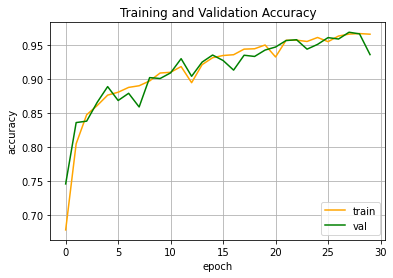

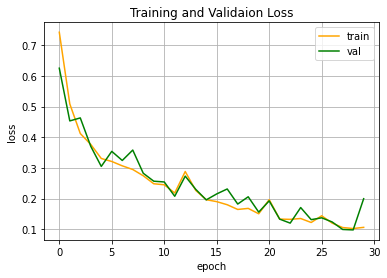

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange')
plt.plot(epochs, val_acc, 'g')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'orange')
plt.plot(epochs, val_loss, 'g')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.title('Training and Validaion Loss')
plt.grid()
plt.figure()

In [ ]:
import keras
model = keras.models.load_model('/workspace/Kamakshi/Weight_file/terrin_weights.h5')

In [ ]:
# Predicting the Test set results
pred = model.predict(test_data)
print("Y_pred:", pred)
print("*******")
y_pred = np.argmax(pred, axis = 1)
print("Y_pred:", y_pred)

2023-09-27 04:29:38.918551: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302
2023-09-27 04:29:40.525242: I tensorflow/stream_executor/cuda/cuda_blas.cc:1792] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Y_pred: [[9.7619778e-01 6.0883667e-03 1.7713234e-02 6.1669260e-07]
 [9.9889344e-01 9.7384455e-04 1.3275621e-04 4.8902717e-13]
 [9.9975103e-01 2.1991323e-04 2.9070226e-05 2.6847660e-15]
 ...
 [2.0515223e-14 3.5408789e-03 2.5890740e-05 9.9643326e-01]
 [5.2285317e-18 8.3034276e-04 1.6792588e-06 9.9916804e-01]
 [2.5266126e-11 1.1051623e-02 2.5040822e-04 9.8869801e-01]]
*******
Y_pred: [0 0 0 ... 3 3 3]


In [ ]:
y_true = np.argmax(test_label, axis = 1)
print("Y_pred:", y_true)

Y_pred: [0 0 0 ... 3 3 3]


In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
target_names = ['grassy', 'marshy', 'rocky', 'sandy']

Text(0.5, 15.0, 'Predicted label')

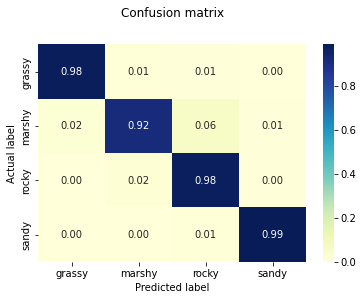

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
p = sns.heatmap(pd.DataFrame(cm), annot=True,xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu" ,fmt='0.2f')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred, target_names = target_names))

              precision    recall  f1-score   support

      grassy       0.98      0.98      0.98      1824
      marshy       0.97      0.92      0.94      1657
       rocky       0.93      0.98      0.95      1644
       sandy       0.99      0.99      0.99      1644

    accuracy                           0.97      6769
   macro avg       0.97      0.97      0.97      6769
weighted avg       0.97      0.97      0.97      6769



In [ ]:
class1 = ['grassy', 'marshy', 'rocky', 'sandy']

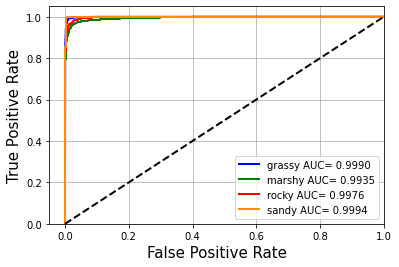

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors =cycle(['blue', 'green', 'red','darkorange'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=class1[i]+' AUC= {1:0.4f}'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
import keras
model = keras.models.load_model('/Users/kamakshiojha/Documents/SIH work/terrin_weights.h5')

1/1 [==============================] - 0s 260ms/step


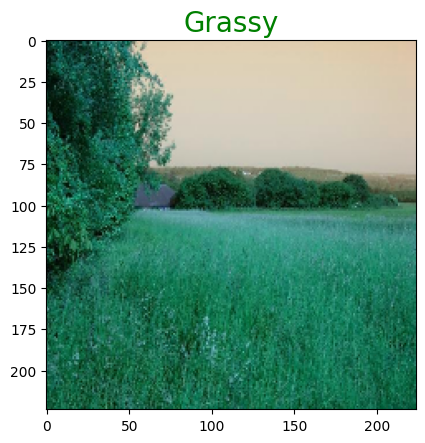

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
def Read_data(path):
    input_img = cv2.imread(path)
    # print(input_img)
    input_img = cv2.resize(input_img, (224, 224))
    input_img = np.array(input_img)
    input_img = input_img.astype('float32')
    input_img = input_img/255
    input_img1 = input_img.reshape(-1, 224, 224, 3)
    pred = model.predict(input_img1)
    pred = np.argmax(pred, axis = 1)
    if pred == 0:
        plt.title('Grassy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred == 1:
        plt.title('Marshy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred == 2:
        plt.title('Rocky', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    else:
        plt.title('Sandy', color = 'green', fontsize = 20)
        plt.imshow(input_img)

path = '/Users/kamakshiojha/Documents/SIH work/test_dataset/grassy1.png'
Read_data(path)

1/1 [==============================] - 0s 209ms/step


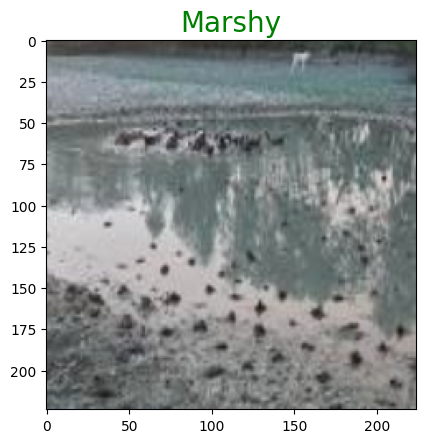

In [ ]:
from matplotlib import pyplot as plt
def Read_data(path):
    input_img = cv2.imread(path)
    input_img = cv2.resize(input_img, (224, 224))
    input_img = np.array(input_img)
    input_img = input_img.astype('float32')
    input_img = input_img/255
    input_img1 = input_img.reshape(-1, 224, 224, 3)
    pred = model.predict(input_img1)
    pred = np.argmax(pred, axis = 1)
    if pred == 0:
        plt.title('Grassy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred == 1:
        plt.title('Marshy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred == 2:
        plt.title('Rocky', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    else:
        plt.title('Sandy', color = 'green', fontsize = 20)
        plt.imshow(input_img)

path = '/Users/kamakshiojha/Documents/SIH work/test_dataset/marshy6.png'
Read_data(path)

1/1 [==============================] - 0s 286ms/step


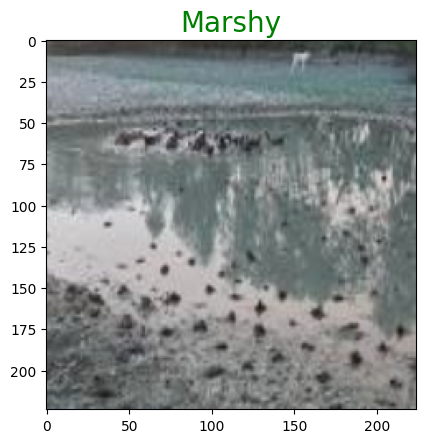

In [ ]:
from matplotlib import pyplot as plt
def Read_data(path):
    input_img = cv2.imread(path)
    input_img = cv2.resize(input_img, (224, 224))
    input_img = np.array(input_img)
    input_img = input_img.astype('float32')
    input_img = input_img/255
    input_img1 = input_img.reshape(-1, 224, 224, 3)
    pred = model.predict(input_img1)
    pred = np.argmax(pred, axis = 1)
    if pred == 0:
        plt.title('Grassy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred == 1:
        plt.title('Marshy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred == 2:
        plt.title('Rocky', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    else:
        plt.title('Sandy', color = 'green', fontsize = 20)
        plt.imshow(input_img)

path = '/Users/kamakshiojha/Documents/SIH work/test_dataset/marshy6.png'
Read_data(path)

1/1 [==============================] - 0s 223ms/step


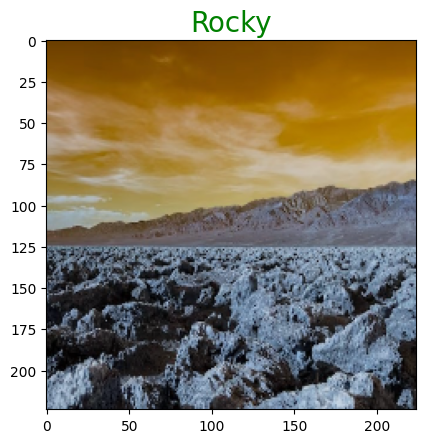

In [ ]:
from matplotlib import pyplot as plt
def Read_data(path):
    input_img = cv2.imread(path)
    input_img = cv2.resize(input_img, (224, 224))
    input_img = np.array(input_img)
    input_img = input_img.astype('float32')
    input_img = input_img/255
    input_img1 = input_img.reshape(-1, 224, 224, 3)
    pred = model.predict(input_img1)
    pred = np.argmax(pred, axis = 1)
    if pred == 0:
        plt.title('Grassy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred == 1:
        plt.title('Marshy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred == 2:
        plt.title('Rocky', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    else:
        plt.title('Sandy', color = 'green', fontsize = 20)
        plt.imshow(input_img)

path = '/Users/kamakshiojha/Documents/SIH work/test_dataset/rocky.png'
Read_data(path)

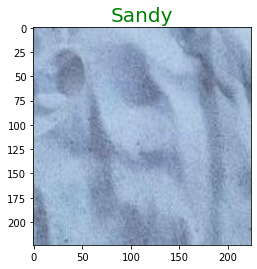

In [ ]:
from matplotlib import pyplot as plt
def Read_data(path):
    input_img = cv2.imread(path)
    input_img = cv2.resize(input_img, (224, 224))
    input_img = np.array(input_img)
    input_img = input_img.astype('float32')
    input_img = input_img/255
    input_img1 = input_img.reshape(-1, 224, 224, 3)
    pred = model.predict(input_img1)
    pred = np.argmax(pred, axis = 1)
#     print(type(pred[0]))
    if pred[0] == 0:
        plt.title('Grassy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred[0] == 1:
        plt.title('Marshy', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    elif pred[0] == 2:
        plt.title('Rocky', color = 'green', fontsize = 20)
        plt.imshow(input_img)
    else:
        plt.title('Sandy', color = 'green', fontsize = 20)
        plt.imshow(input_img)

path = '/workspace/Kamakshi/Test_data/download (3).jpeg'
Read_data(path)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels_onehot = to_categorical(t_label, num_classes=4)
val_labels_onehot = to_categorical(val_label, num_classes=4)
test_labels_onehot = to_categorical(test_label, num_classes=4)


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

efficientnet_model = models.Sequential()

efficientnet_base = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

efficientnet_base.trainable = False

efficientnet_model.add(efficientnet_base)
efficientnet_model.add(layers.GlobalAveragePooling2D())
efficientnet_model.add(layers.Dense(128, activation='relu'))
efficientnet_model.add(layers.Dropout(0.5))
efficientnet_model.add(layers.Dense(4, activation='softmax'))

efficientnet_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

history_efficientnet = efficientnet_model.fit(
    t_data, train_labels_onehot,
    validation_data=(val_data, val_labels_onehot),
    epochs=10,
    batch_size=32
)
test_loss, test_acc = efficientnet_model.evaluate(test_data, test_labels_onehot)
print(f'EfficientNet Test accuracy: {test_acc:.2f}')


In [ ]:
from tensorflow.keras.applications import VGG16

vgg16_model = models.Sequential()

vgg16_base = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

vgg16_base.trainable = False

vgg16_model.add(vgg16_base)
vgg16_model.add(layers.Flatten())
vgg16_model.add(layers.Dense(512, activation='relu'))
vgg16_model.add(layers.Dropout(0.5))
vgg16_model.add(layers.Dense(4, activation='softmax'))

vgg16_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

history_vgg16 = vgg16_model.fit(
    t_data, train_labels_onehot,
    validation_data=(val_data, val_labels_onehot),
    epochs=10,
    batch_size=32
)

test_loss_vgg, test_acc_vgg = vgg16_model.evaluate(test_data, test_labels_onehot)
print(f'VGG16 Test accuracy: {test_acc_vgg:.2f}')


In [ ]:

efficientnet_base.trainable = True

efficientnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

history_efficientnet_fine = efficientnet_model.fit(
    t_data, train_labels_onehot,
    validation_data=(val_data, val_labels_onehot),
    epochs=5,
    batch_size=32
)


In [ ]:

vgg16_base.trainable = True

vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

history_vgg16_fine = vgg16_model.fit(
    t_data, train_labels_onehot,
    validation_data=(val_data, val_labels_onehot),
    epochs=5,
    batch_size=32
)


In [ ]:
efficientnet_model.save('efficientnet_terrain_classification.h5')
vgg16_model.save('vgg16_terrain_classification.h5')


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_efficientnet.history['accuracy'])
plt.plot(history_efficientnet.history['val_accuracy'])
plt.title('EfficientNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('VGG16 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
